In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

%matplotlib inline

In [2]:
def label(ax, string):
    ax.annotate(string, (1, 1), xytext=(-8, -8), ha='right', va='top',
                size=14, xycoords='axes fraction', textcoords='offset points')
    
def acorr(x, ax=None):
    if ax is None:
        ax = plt.gca()

    x = x - x.mean()

    autocorr = np.correlate(x, x, mode='full')
    autocorr = autocorr[x.size:]
    autocorr /= (1e-10 + autocorr.max())
    print(np.sum(autocorr))

    return ax.stem(autocorr)
    
def calculate_ess(data):
    num_samples = data.shape[0]
    fig, axes = plt.subplots(nrows=4, figsize=(8, 12))
    fig.tight_layout()

    axes[0].plot(data)
    label(axes[0], 'Raw Data')

    _, c, _, _ = axes[1].acorr(data, maxlags=data.size-1)
    label(axes[1], 'Matplotlib Autocorrelation')

#     tsaplots.plot_acf(data, axes[2])
#     label(axes[2], 'Statsmodels Autocorrelation')

    a = pd.tools.plotting.autocorrelation_plot(data, ax=axes[2])
    label(axes[2], 'Pandas Autocorrelation')
    
    acorr(data, axes[3])
    label(axes[3], 'self-defined')

    # Remove some of the titles and labels that were automatically added
    for ax in axes.flat:
        ax.set(title='', xlabel='')
    plt.show()

    return num_samples / (1 + 2 * sum(c[c.size/2:]))

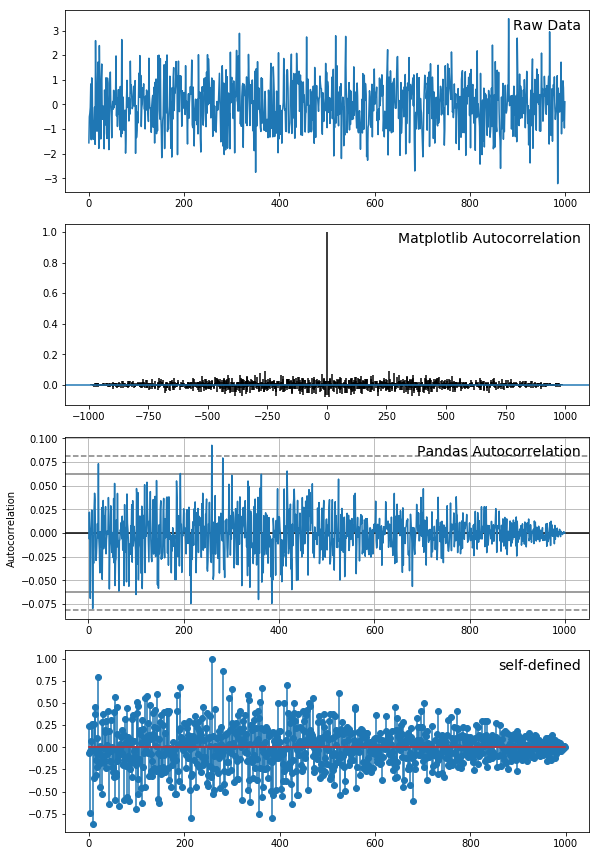

472.68244374828754


In [15]:
np.random.seed()
samples = np.random.normal(size=1000)

print(calculate_ess(samples))

AxesSubplot(0.0584635,0.279051;0.909006x0.210069)


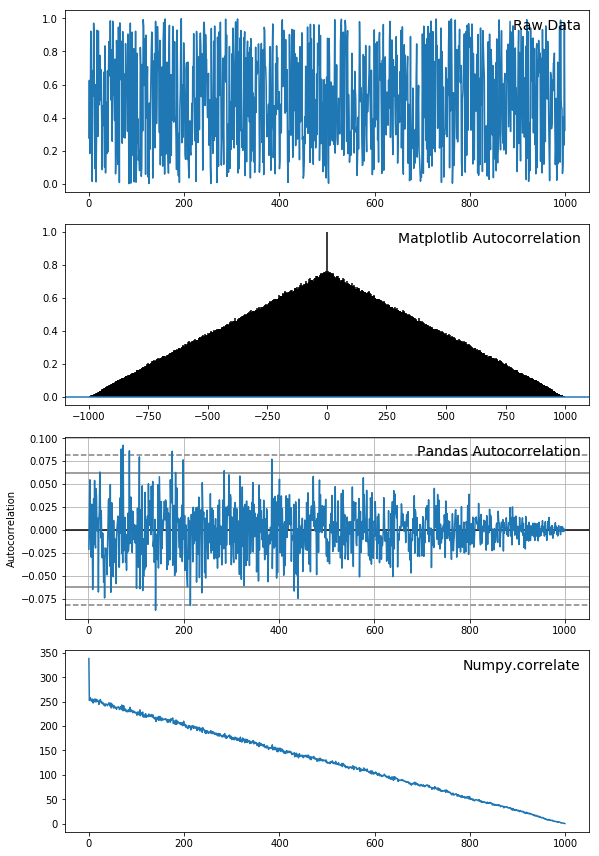

1.3270969386357212


In [11]:
np.random.seed()
samples = np.random.uniform(size=1000)

print(calculate_ess(samples))

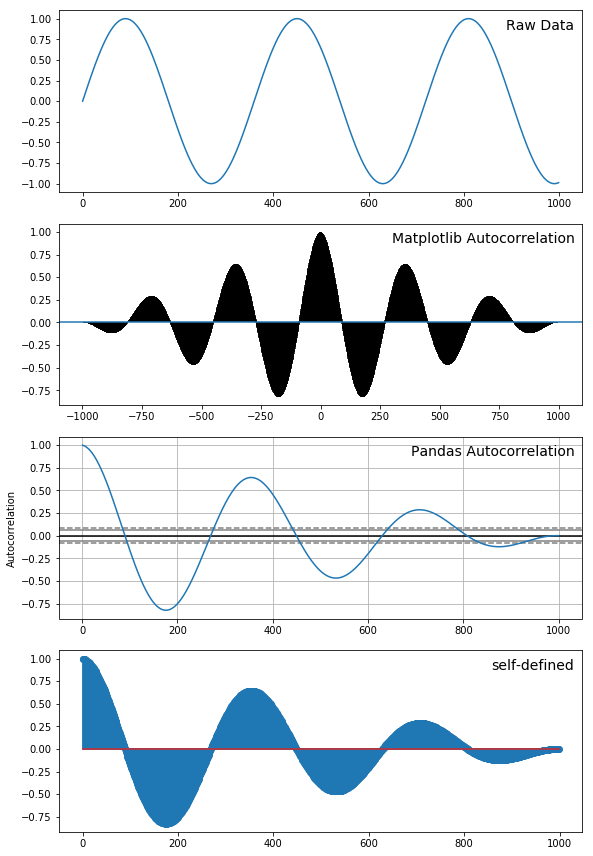

152.9791626631384


In [16]:
np.random.seed()
samples = np.sin(np.arange(1000) * np.pi / 180. )

print(calculate_ess(samples))

0.0


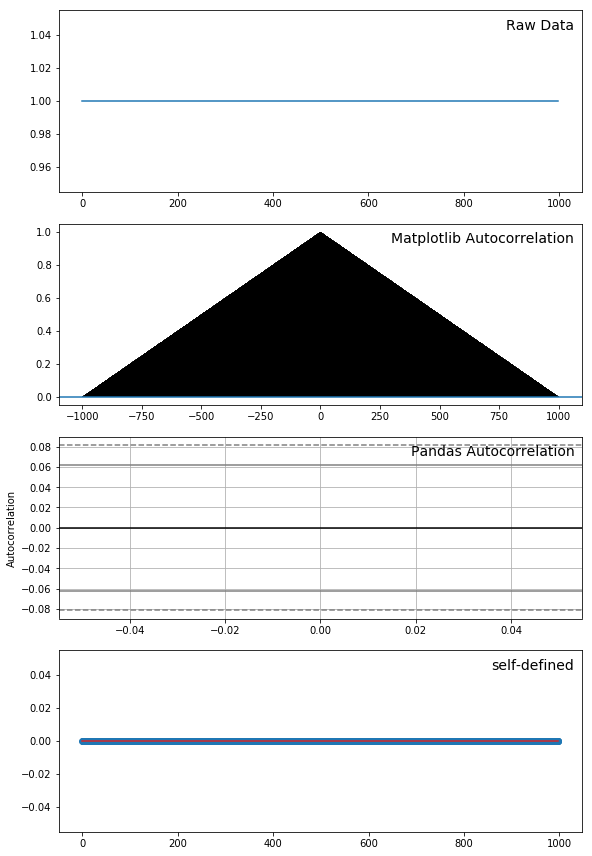

0.9980039920159679


In [20]:
np.random.seed()
samples = np.ones((1000,))

print(calculate_ess(samples))

In [3]:
if os.path.isfile("samples/MH_4000_10000_4262.npy"):
    print("Loading from local")
    np_array = np.load("samples/MH_4000_10000_4262.npy")

print(np_array.shape)

Loading from local
(6001, 10)


-0.5084075478450103


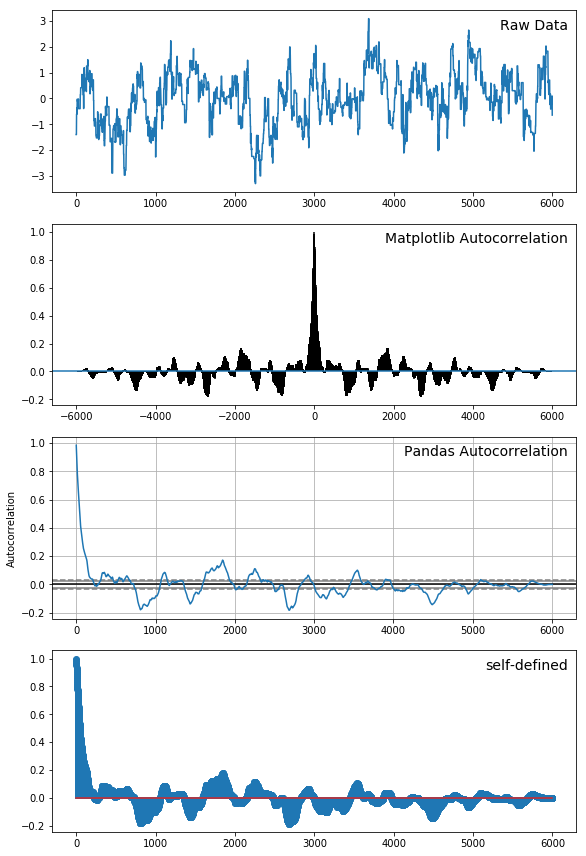

3000.5000000001287
-0.5063169601652184


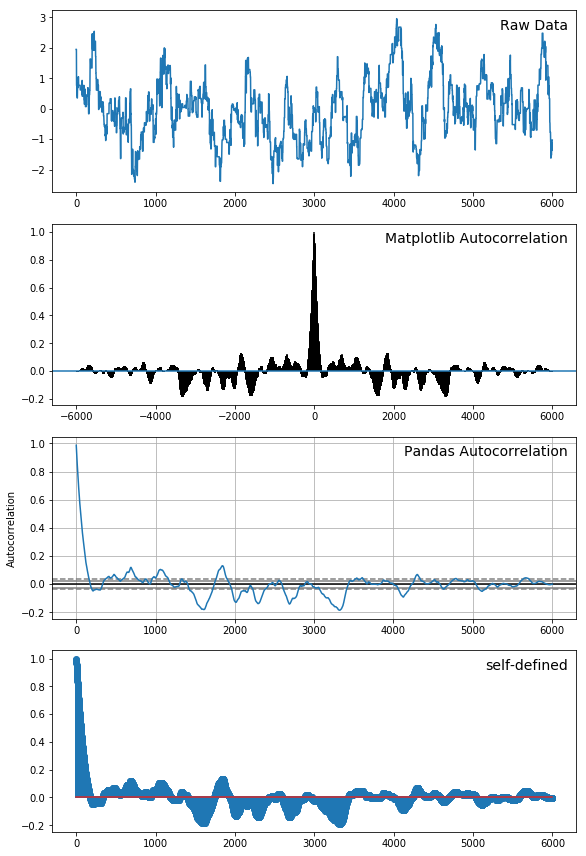

3000.4999999986476
-0.5109585142299977


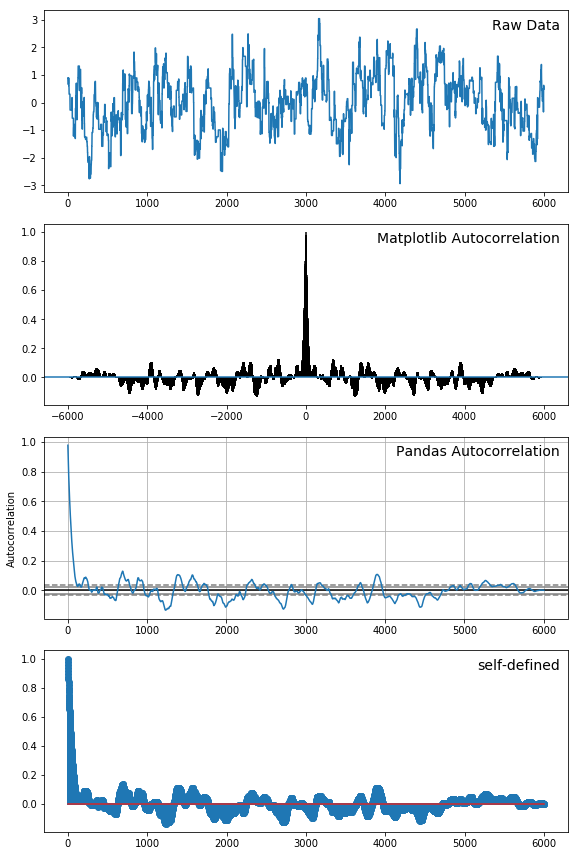

3000.500000000589
-0.5049586987054582


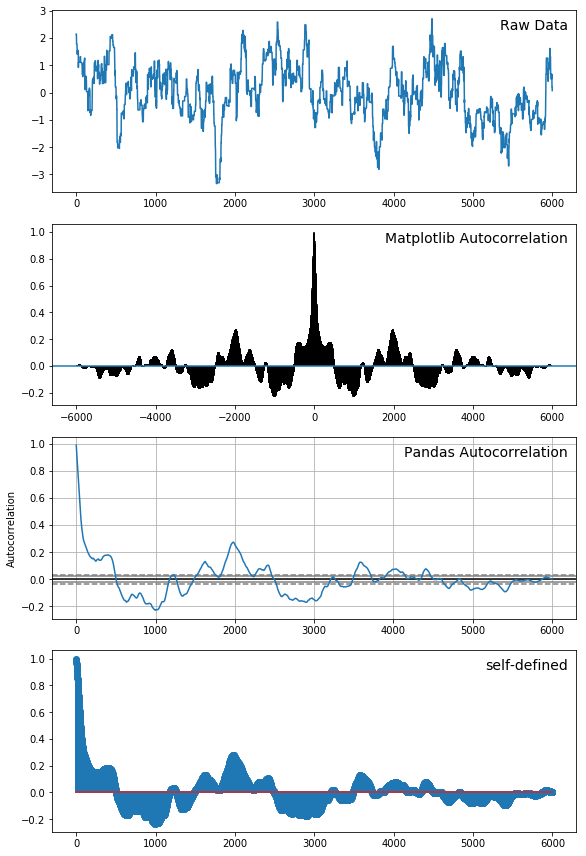

3000.5000000003884
-0.6112009803334599


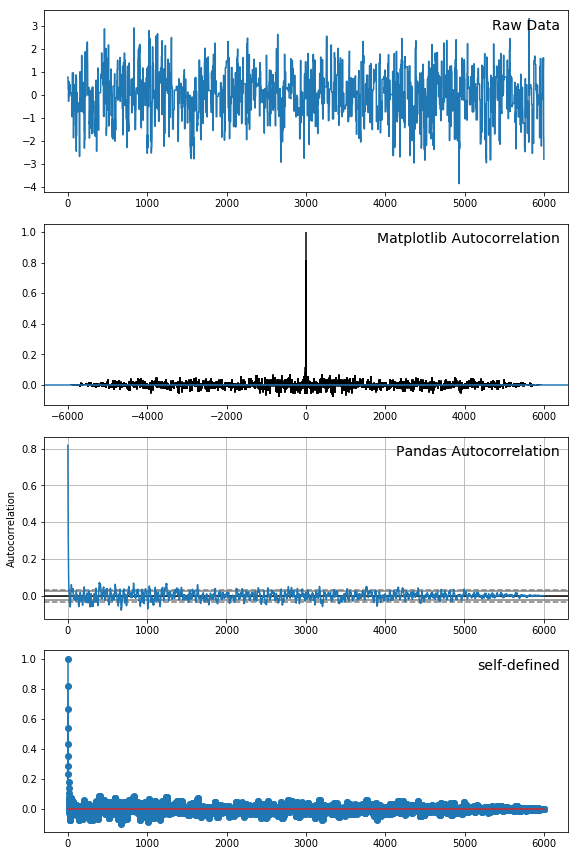

3000.5000000000537
-0.5011733848653819


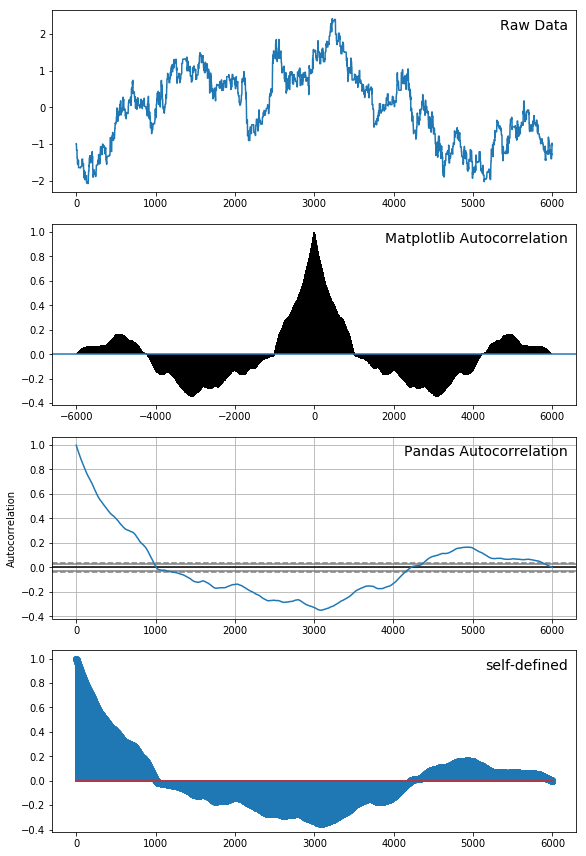

3000.500000003914
-0.5411362408806468


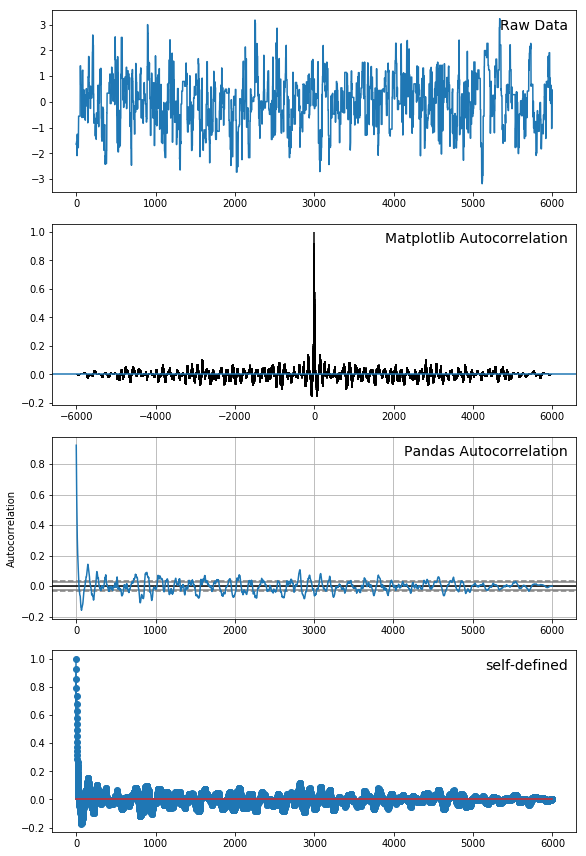

3000.499999999987
-0.5097034501974438


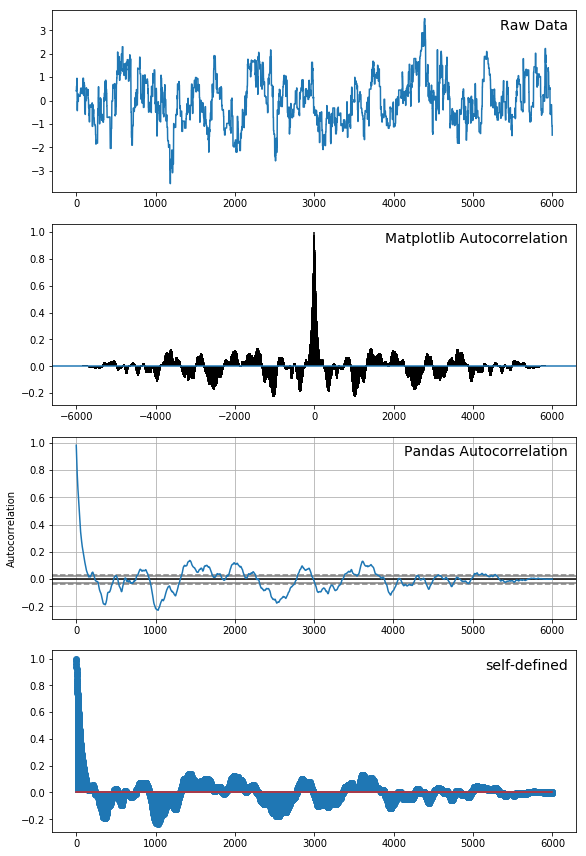

3000.499999999936
-0.5012321007747573


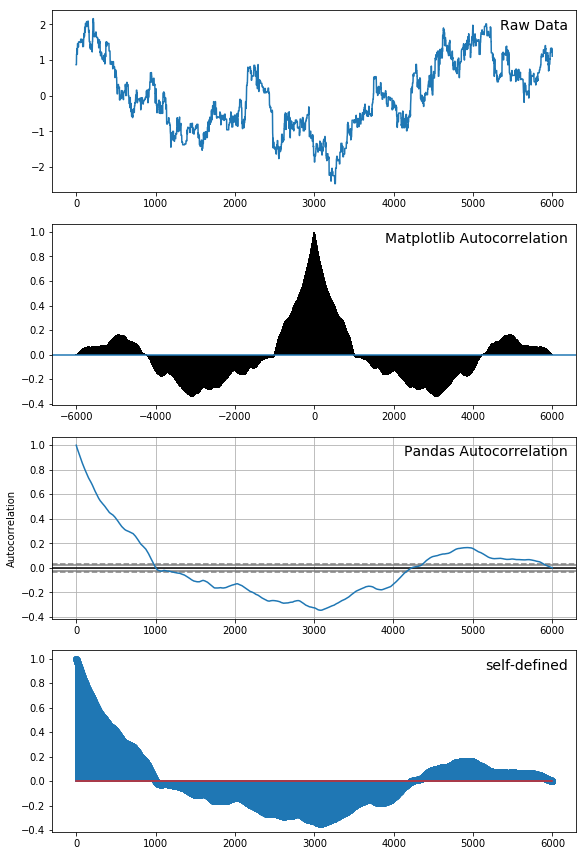

3000.4999999995002
-0.5174382605228365


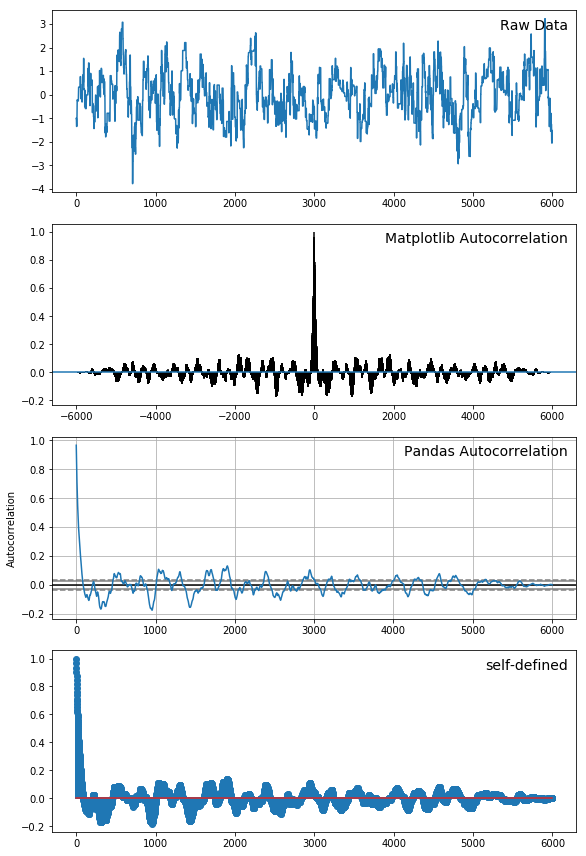

3000.5000000000286


In [5]:
for i in range(10):
    samples = np_array[:, i]
    mean = samples - np.mean(samples)
    samples = mean / (np.std(mean, axis=0))
    print(calculate_ess(samples))
    plt.close()